<a href="https://colab.research.google.com/github/prashankranu987/Bankruptcy-EDA/blob/main/bankrupty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bankruption Analysis**

**registration_date-->**Company registration date (company creation date), e.g. 2021-01-27

**legal_form_name-->**Name of company legal form, e.g. Small Partnership, Private Limited Liability Company

**status name-->**Legal status of the company (latest status, not the one that was on a particular year), e.g. Bankrupt, Under Reorganization

**finance_year_start_date-->**Start of the financial year for which information is registered, e.g. 2019-01-01

**finance_year_end_date-->**End of the financial year for which information is registered, e.g. 2019-12-31

**document_registration_date-->**Date when finance documents were registered, e.g. 2020-06-01

**equity-->**Equity of company

**liabilities-->**Liabilities of the company

**long_term_financial_assets-->**Long-term financial assets of the company

**short term financial assets-->**Short-term financial assets of the company

**profit_before_taxes-->**Profit before taxes of the company

**net_profit-->**Company net profit

**sales_revenue-->**Sales revenue of the company

**idx_eq_lia_ratio-->**Radio of equity / liabilities

**idx_lia_fin_as_ratio-->**Ratio liabilities / (long term + short term financial assets)

**idx sh fin as lia_ratio-->**Ratio short term financial assets / liabilities

**idx_fin_as_eq_ratio-->**Ratio (long term + short term financial assets) / equity

**idx fin as lia ratio-->**Ratio (long term + short term financial assets) / liabilities

**idx_n_prof_fin_as_ratio-->**Ratio net profit / (long term + short term financial assets)

**idx_s_rev_fin_as_ratio-->**Ratio sales revenue / (long term + short term financial assets)

**idx_prof_tax_eq_ratio-->**Ratio profit before taxes / equity

**idx_prof_tax_fin_as_ratio-->**Ratio profit before taxes / (long term + short term financial assets)

**null ->** indicates that data was not provided in finance year balance sheets or profit/loss statements

**Statuses Under Restructuring, Going Bankrupt, Bankrupt, Liquidation due to bankruptcy were used as bankruptcy indicators.**



**Two different bankruptcy labels are created:**

**is_bankrupted_last_year - when only the last financial years of the company being active are labeled as bankrupted
is_bankrupted_all_years - when all companies' financial years (despite the company went bankrupt only during the last years) are marked as bankrupted**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
dataset=pd.read_csv('/content/bankruptcy_dataset.csv')

In [ ]:
dataset.head(10)

,code,registration_date,legal_form_name,status_name,finance_year_start_date,finance_year_end_date,document_registration_date,equity,liabilities,long_term_financial_assets,...,idx_lia_fin_as_ratio,idx_sh_fin_as_lia_ratio,idx_fin_as_eq_ratio,idx_fin_as_lia_ratio,idx_n_prof_fin_as_ratio,idx_s_rev_fin_as_ratio,idx_prof_tax_eq_ratio,idx_prof_tax_fin_as_ratio,is_bankrupted_last_year,is_bankrupted_all_years
0,110001436,1991-04-02,Private Limited Liability Company,Under Liquidation,2013-01-01,2013-12-31,2018-04-12,1474658.0,166.0,1140507.0,...,0.000113,2013.957831,1.000113,8884.481928,-0.902718,NaN,-0.902820,-0.902718,0.0,0.0
1,110001436,1991-04-02,Private Limited Liability Company,Under Liquidation,2014-01-01,2014-12-31,2018-04-02,1195171.0,836.0,1097226.0,...,0.000699,118.159091,1.000699,1430.630383,0.004522,NaN,0.004738,0.004735,0.0,0.0
2,110001436,1991-04-02,Private Limited Liability Company,Under Liquidation,2015-01-01,2015-12-31,2018-04-02,346902.0,180.0,316934.0,...,0.000519,167.488889,1.000519,1928.233333,0.002181,NaN,0.002286,0.002285,0.0,0.0
3,110001436,1991-04-02,Private Limited Liability Company,Under Liquidation,2016-01-01,2016-12-31,2018-04-02,343801.0,158.0,316142.0,...,0.000459,176.056962,1.000460,2176.955696,-0.009016,NaN,NaN,NaN,0.0,0.0
4,110001436,1991-04-02,Private Limited Liability Company,Under Liquidation,2017-01-01,2017-12-31,2018-04-02,2415.0,244.0,0.0,...,0.091764,10.897541,1.101035,10.897541,-128.388868,NaN,NaN,NaN,0.0,0.0
5,110003259,1991-04-15,Private Limited Liability Company,Liquidation being initiated,2014-01-01,2014-12-31,2015-06-03,-12703.0,86775.0,11781.0,...,1.171495,0.717845,-5.831064,0.853610,-0.089710,NaN,0.523105,-0.089710,0.0,0.0
6,110003782,1991-04-25,Private Limited Liability Company,Removed,2014-01-01,2014-12-31,2015-02-24,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
7,110003782,1991-04-25,Private Limited Liability Company,Removed,2015-01-01,2015-12-31,2016-05-18,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
8,110003978,1991-04-25,Private Limited Liability Company,No legal proceedings,2014-01-01,2014-12-31,2015-06-01,4984590.0,78795.0,3596263.0,...,0.015562,18.619481,1.015808,64.260232,0.020901,0.112119,0.022468,0.022118,0.0,0.0
9,110003978,1991-04-25,Private Limited Liability Company,No legal proceedings,2015-01-01,2015-12-31,2016-05-16,1470585.0,28789.0,1039590.0,...,0.019201,15.970822,1.019577,52.081489,0.041539,0.118591,0.044699,0.043840,0.0,0.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609 entries, 0 to 9608
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   code                         9609 non-null   int64  
 1   registration_date            9609 non-null   object 
 2   legal_form_name              9609 non-null   object 
 3   status_name                  9609 non-null   object 
 4   finance_year_start_date      9609 non-null   object 
 5   finance_year_end_date        9609 non-null   object 
 6   document_registration_date   9609 non-null   object 
 7   equity                       9567 non-null   float64
 8   liabilities                  9443 non-null   float64
 9   long_term_financial_assets   9602 non-null   float64
 10  short_term_financial_assets  9434 non-null   float64
 11  profit_before_taxes          8376 non-null   float64
 12  net_profit                   9250 non-null   float64
 13  sales_revenue     

In [ ]:
dataset['registration_date']=pd.to_datetime(dataset['registration_date']) # this code uses to do calculation in datetime for pandas function
dataset['financer_year_start_date']=pd.to_datetime(dataset['finance_year_start_date'])
dataset['finance_year_end_data']=pd.to_datetime(dataset['finance_year_end_date'])
dataset['document_registration_date']=pd.to_datetime(dataset['document_registration_date'],errors='coerce')

In [ ]:
dataset.head(10)

,code,registration_date,legal_form_name,status_name,finance_year_start_date,finance_year_end_date,document_registration_date,equity,liabilities,long_term_financial_assets,...,idx_fin_as_eq_ratio,idx_fin_as_lia_ratio,idx_n_prof_fin_as_ratio,idx_s_rev_fin_as_ratio,idx_prof_tax_eq_ratio,idx_prof_tax_fin_as_ratio,is_bankrupted_last_year,is_bankrupted_all_years,financer_year_start_date,finance_year_end_data
0,110001436,1991-04-02,Private Limited Liability Company,Under Liquidation,2013-01-01,2013-12-31,2018-04-12,1474658.0,166.0,1140507.0,...,1.000113,8884.481928,-0.902718,NaN,-0.902820,-0.902718,0.0,0.0,2013-01-01,2013-12-31
1,110001436,1991-04-02,Private Limited Liability Company,Under Liquidation,2014-01-01,2014-12-31,2018-04-02,1195171.0,836.0,1097226.0,...,1.000699,1430.630383,0.004522,NaN,0.004738,0.004735,0.0,0.0,2014-01-01,2014-12-31
2,110001436,1991-04-02,Private Limited Liability Company,Under Liquidation,2015-01-01,2015-12-31,2018-04-02,346902.0,180.0,316934.0,...,1.000519,1928.233333,0.002181,NaN,0.002286,0.002285,0.0,0.0,2015-01-01,2015-12-31
3,110001436,1991-04-02,Private Limited Liability Company,Under Liquidation,2016-01-01,2016-12-31,2018-04-02,343801.0,158.0,316142.0,...,1.000460,2176.955696,-0.009016,NaN,NaN,NaN,0.0,0.0,2016-01-01,2016-12-31
4,110001436,1991-04-02,Private Limited Liability Company,Under Liquidation,2017-01-01,2017-12-31,2018-04-02,2415.0,244.0,0.0,...,1.101035,10.897541,-128.388868,NaN,NaN,NaN,0.0,0.0,2017-01-01,2017-12-31
5,110003259,1991-04-15,Private Limited Liability Company,Liquidation being initiated,2014-01-01,2014-12-31,2015-06-03,-12703.0,86775.0,11781.0,...,-5.831064,0.853610,-0.089710,NaN,0.523105,-0.089710,0.0,0.0,2014-01-01,2014-12-31
6,110003782,1991-04-25,Private Limited Liability Company,Removed,2014-01-01,2014-12-31,2015-02-24,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2014-01-01,2014-12-31
7,110003782,1991-04-25,Private Limited Liability Company,Removed,2015-01-01,2015-12-31,2016-05-18,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2015-01-01,2015-12-31
8,110003978,1991-04-25,Private Limited Liability Company,No legal proceedings,2014-01-01,2014-12-31,2015-06-01,4984590.0,78795.0,3596263.0,...,1.015808,64.260232,0.020901,0.112119,0.022468,0.022118,0.0,0.0,2014-01-01,2014-12-31
9,110003978,1991-04-25,Private Limited Liability Company,No legal proceedings,2015-01-01,2015-12-31,2016-05-16,1470585.0,28789.0,1039590.0,...,1.019577,52.081489,0.041539,0.118591,0.044699,0.043840,0.0,0.0,2015-01-01,2015-12-31


In [ ]:
dataset.describe()

,code,registration_date,document_registration_date,equity,liabilities,long_term_financial_assets,short_term_financial_assets,profit_before_taxes,net_profit,sales_revenue,...,idx_fin_as_eq_ratio,idx_fin_as_lia_ratio,idx_n_prof_fin_as_ratio,idx_s_rev_fin_as_ratio,idx_prof_tax_eq_ratio,idx_prof_tax_fin_as_ratio,is_bankrupted_last_year,is_bankrupted_all_years,financer_year_start_date,finance_year_end_data
count,9.609000e+03,9609,9608,9.567000e+03,9.443000e+03,9.602000e+03,9.434000e+03,8.376000e+03,9.250000e+03,8.544000e+03,...,9234.000000,8.879000e+03,8880.000000,8494.000000,8252.000000,8062.000000,9608.000000,9608.000000,9609,9609
mean,1.109000e+08,1996-10-01 15:02:45.220106112,2018-10-07 13:48:03.597002240,5.521960e+06,3.528519e+06,6.701231e+06,4.100099e+06,7.277205e+05,5.386062e+05,1.147777e+07,...,5.179114,1.368293e+03,-21.833783,25.696623,0.116061,-23.844819,0.001665,0.008951,2017-03-28 23:26:16.896659456,2018-03-27 21:44:04.645644800
min,1.100014e+08,1990-05-29 00:00:00,2015-01-05 00:00:00,-4.063982e+07,-1.034680e+05,0.000000e+00,-3.972000e+03,-4.752500e+07,-4.951400e+07,-2.638380e+05,...,-2583.987741,-8.612000e+03,-111554.000000,-8.329670,-349.739130,-111554.000000,0.000000,0.000000,2004-01-01 00:00:00,2004-12-31 00:00:00
25%,1.105692e+08,1993-12-30 00:00:00,2016-06-20 18:00:00,2.631850e+04,3.074900e+04,6.000000e+03,5.794700e+04,-9.922500e+02,-1.595500e+03,1.240072e+05,...,1.067115,1.369123e+00,-0.013338,0.555264,0.000000,-0.008980,0.000000,0.000000,2015-01-01 00:00:00,2015-12-31 00:00:00
50%,1.107945e+08,1996-04-04 00:00:00,2018-06-15 00:00:00,2.927840e+05,1.980980e+05,7.880900e+04,3.593130e+05,2.269700e+04,1.199550e+04,9.125075e+05,...,1.420836,2.366265e+00,0.031213,1.472772,0.092354,0.039852,0.000000,0.000000,2017-01-01 00:00:00,2017-12-31 00:00:00
75%,1.115076e+08,1999-03-10 00:00:00,2020-07-15 00:00:00,1.457255e+06,1.168935e+06,7.053185e+05,1.737654e+06,2.437822e+05,1.562262e+05,4.885199e+06,...,2.343396,5.594690e+00,0.116263,2.611007,0.268090,0.132846,0.000000,0.000000,2019-01-01 00:00:00,2019-12-31 00:00:00
max,1.117071e+08,2003-12-29 00:00:00,2022-08-31 00:00:00,3.494390e+09,1.489659e+09,6.529710e+09,8.367420e+08,1.799540e+08,1.794440e+08,2.184780e+09,...,12416.800000,3.845608e+06,106.704188,157137.000000,247.014011,106.704188,1.000000,1.000000,2022-04-01 00:00:00,2022-05-10 00:00:00
std,5.073481e+05,NaN,NaN,5.193184e+07,2.750702e+07,8.607781e+07,2.189154e+07,5.290623e+06,4.493802e+06,6.289709e+07,...,150.465029,6.521867e+04,1364.329721,1765.974250,7.442268,1431.848847,0.040776,0.094190,NaN,NaN


**No of companies in  each target list**


In [ ]:
companies = dataset.groupby(['code','is_bankrupted_all_years']).size().reset_index()
print(companies)

           code  is_bankrupted_all_years   0
0     110001436                      0.0   5
1     110003259                      0.0   1
2     110003782                      0.0   2
3     110003978                      0.0   8
4     110004884                      0.0   8
...         ...                      ...  ..
1393  111703588                      0.0   8
1394  111703969                      0.0  10
1395  111704875                      0.0   8
1396  111705062                      0.0   8
1397  111706730                      0.0   1

[1398 rows x 3 columns]


In [ ]:
companies_count=companies.is_bankrupted_all_years.value_counts()
print(companies_count)

is_bankrupted_all_years
0.0    1382
1.0      16
Name: count, dtype: int64


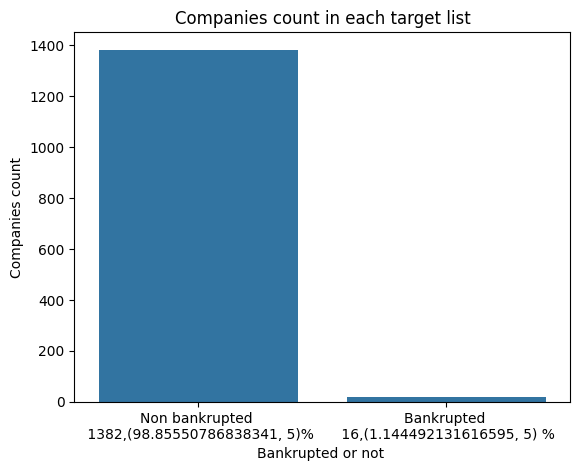

In [ ]:
sns.barplot(x=companies_count.index,y=companies_count)
plt.xlabel('Bankrupted or not ')
plt.ylabel('Companies count')

plt.xticks((0,1),[f'Non bankrupted \n {companies_count[0]},{round(companies_count[0])/companies_count.sum()*100,5}%',
           f'Bankrupted \n {companies_count[1]},{round(companies_count[1])/companies_count.sum()*100,5} %'])




plt.title('Companies count in each target list')
plt.show()


Number of samples of each target class

In [ ]:
companies_rows=dataset.groupby(['is_bankrupted_all_years']).size().to_frame('size').reset_index()
print(companies_rows)

   is_bankrupted_all_years  size
0                      0.0  9522
1                      1.0    86


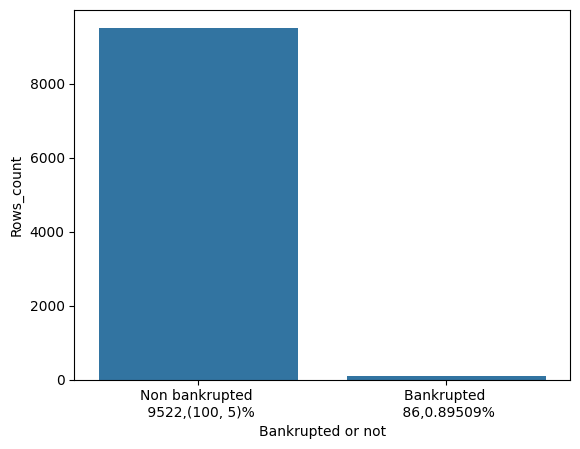

In [ ]:
sns.barplot(x=companies_rows['is_bankrupted_all_years'],y=companies_rows['size'])
plt.xlabel('Bankrupted or not')
plt.ylabel('Rows_count')
plt.xticks((0,1),[f"Non bankrupted \n {companies_rows['size'][0]},{round(companies_rows['size'][0] / companies_rows['size'].sum())*100,5}%",
                  f"Bankrupted \n { companies_rows['size'][1]},{round(companies_rows['size'][1]/companies_rows['size'].sum()*100,5)}%"])
plt.show()

legal status by a target class

In [ ]:
companies_rows =dataset.groupby(['status_name','is_bankrupted_last_year']).size().to_frame('size').reset_index()
print(companies_rows)

                      status_name  is_bankrupted_last_year  size
0                        Bankrupt                      0.0    38
1                        Bankrupt                      1.0     9
2                  Going Bankrupt                      0.0    13
3                  Going Bankrupt                      1.0     3
4     Liquidation being initiated                      0.0    29
5   Liquidation due to bankruptcy                      0.0    12
6   Liquidation due to bankruptcy                      1.0     3
7            No legal proceedings                      0.0  8712
8       Partic. in Reorganization                      0.0    16
9             Partic. in division                      0.0     8
10                        Removed                      0.0   646
11              Under Liquidation                      0.0   111
12            Under Restructuring                      0.0     7
13            Under Restructuring                      1.0     1


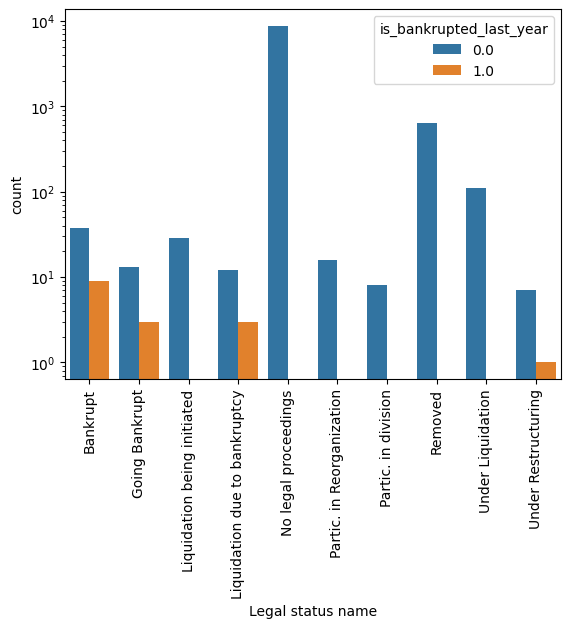

In [ ]:
sns.barplot(data=companies_rows,x='status_name',y='size',hue='is_bankrupted_last_year')
plt.yscale('log')
plt.xlabel('Legal status name')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

Coorelation with the heat map

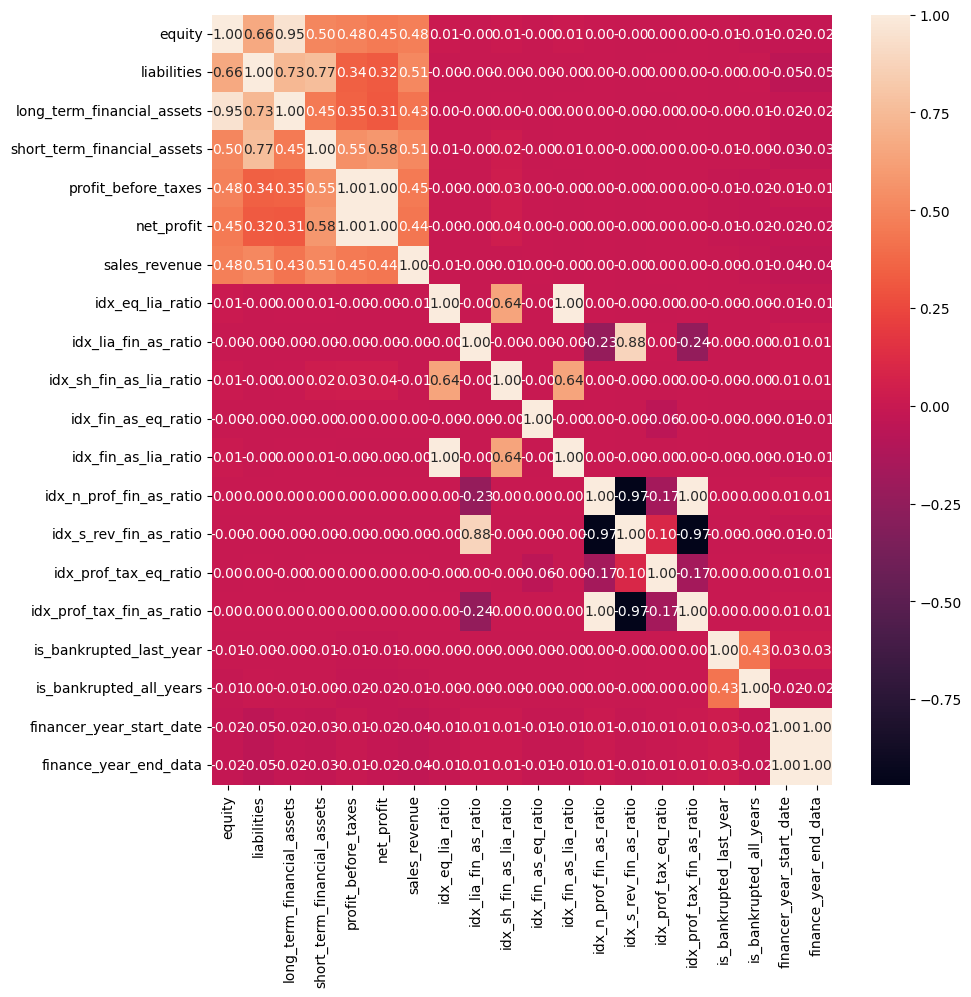

In [ ]:
fig, ax =plt.subplots(figsize=(10,10))
sns.heatmap(dataset[dataset.columns[7:]].corr(),ax=ax,annot=True ,fmt='.2f')
plt.show()

Distribution and the box plots of each variable

In [ ]:
def variable_chart(data, variable, hue):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    g = sns.kdeplot(dataset,
             x=variable,
             hue=hue,
             ax=axes[0])
    g.set(yscale='log')
    g.set(xscale='linear')
    g.tick_params(axis='x', labelrotation=90)

    g1 = sns.boxplot(dataset,
                     x='is_bankrupted_last_year',
                     y=variable,
                     ax=axes[1])
    g1.set(yscale='log')

    plt.show()


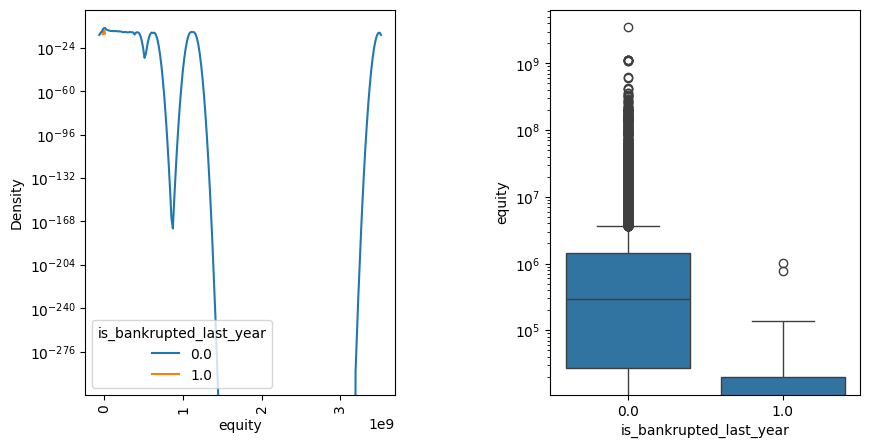

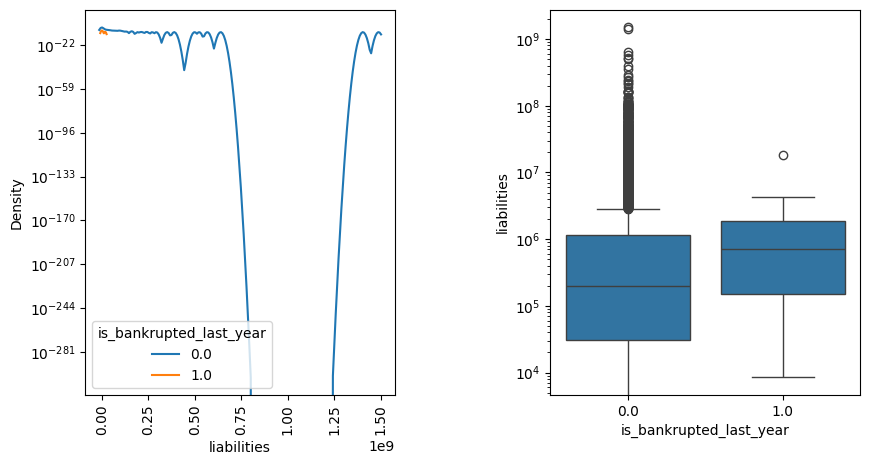

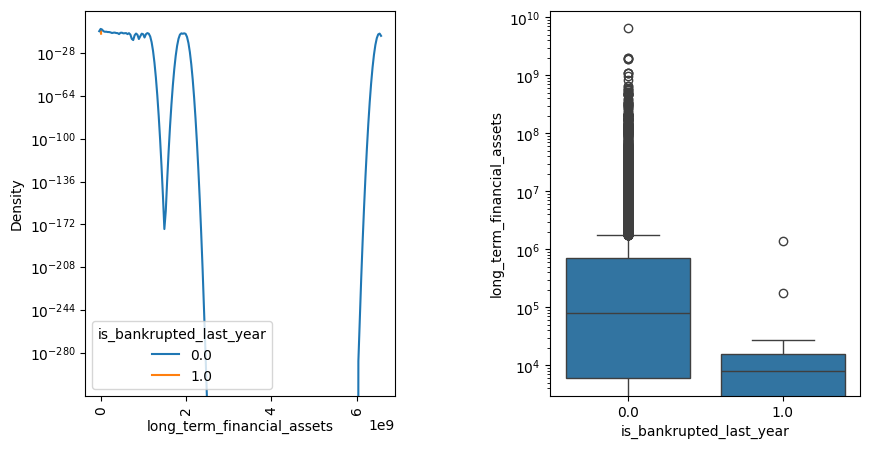

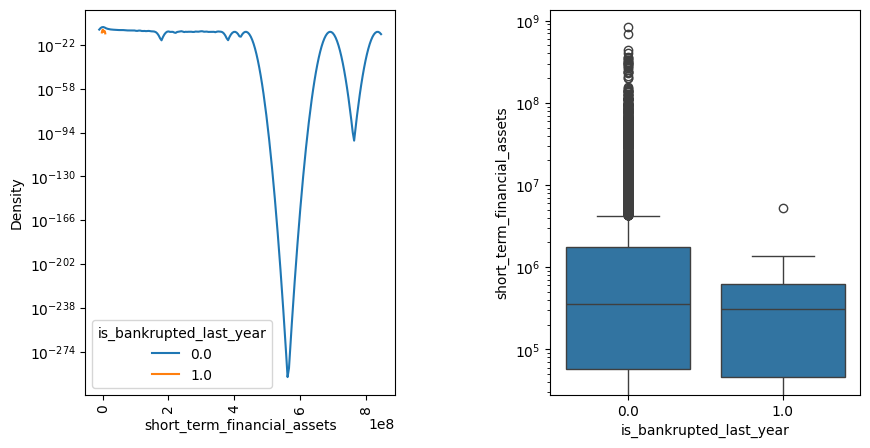

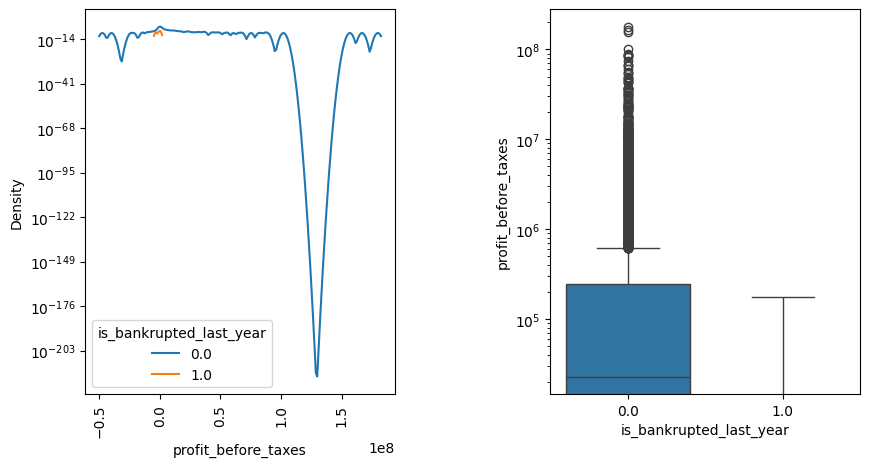

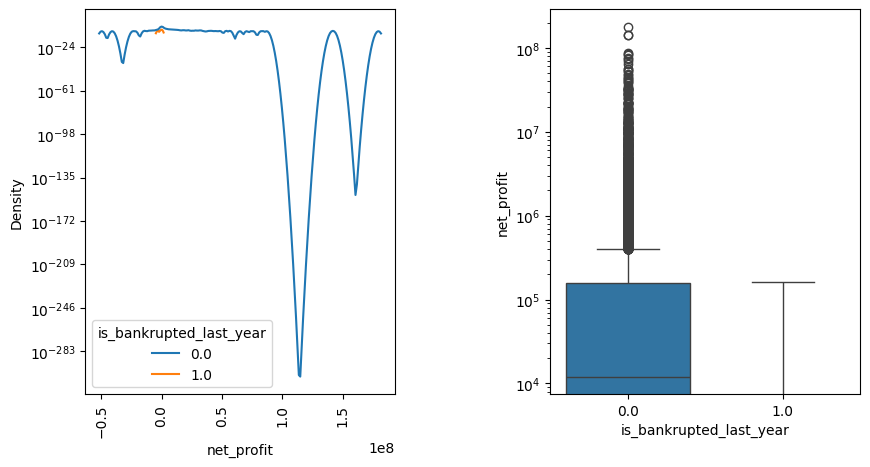

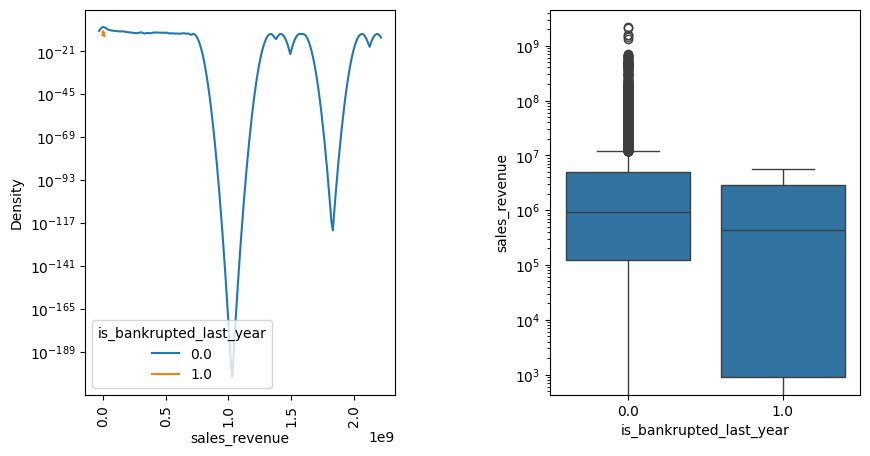

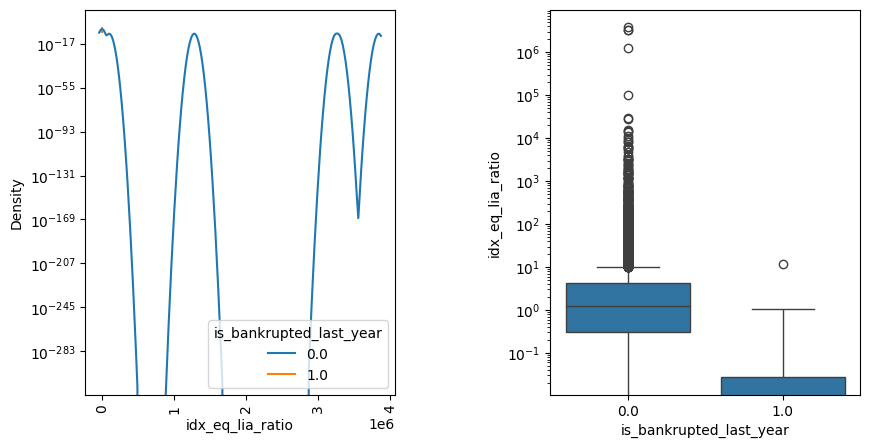

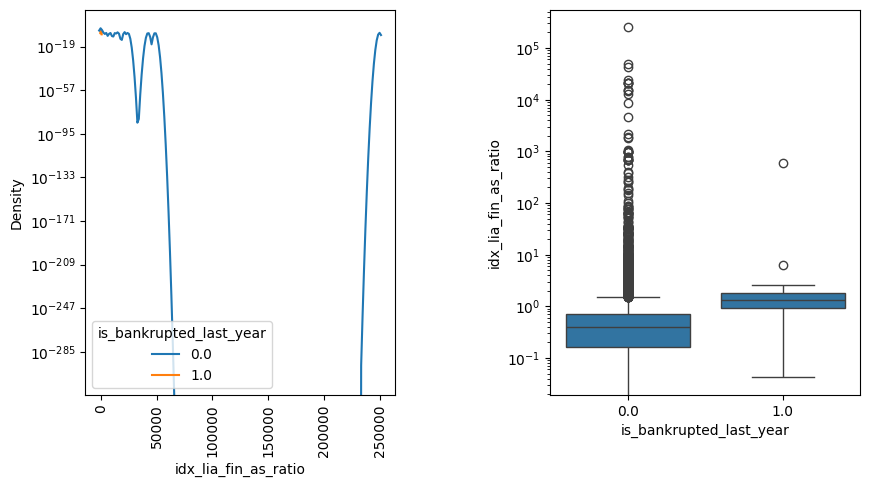

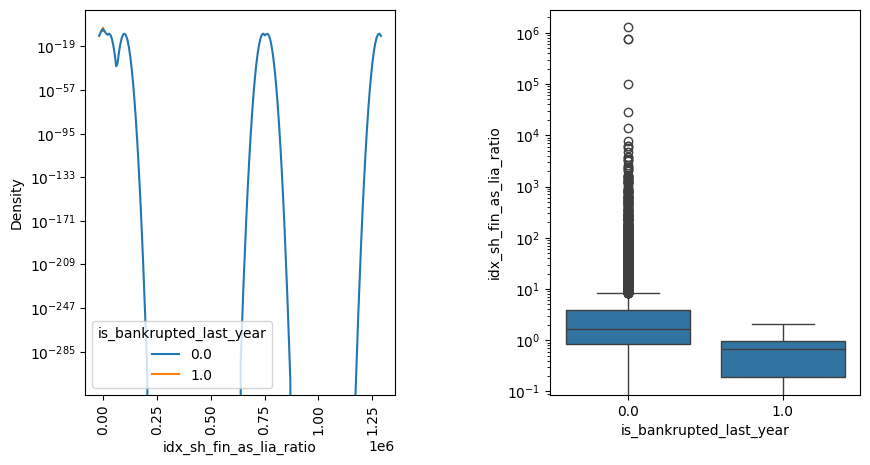

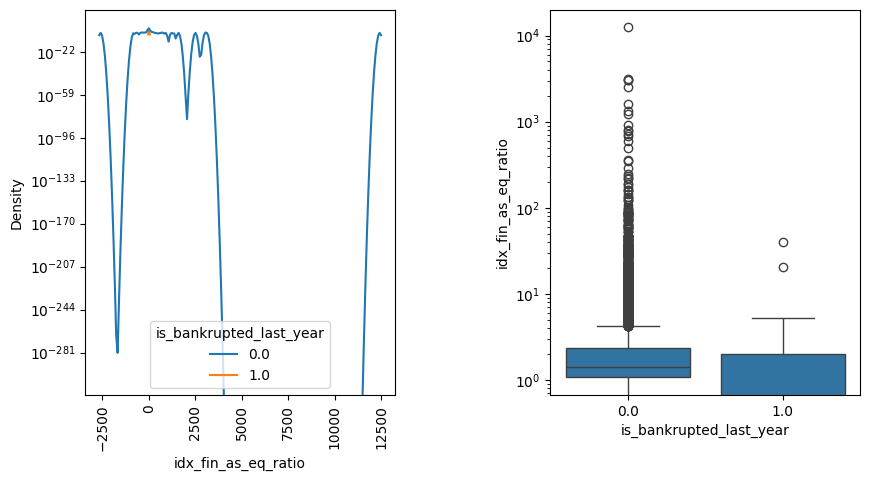

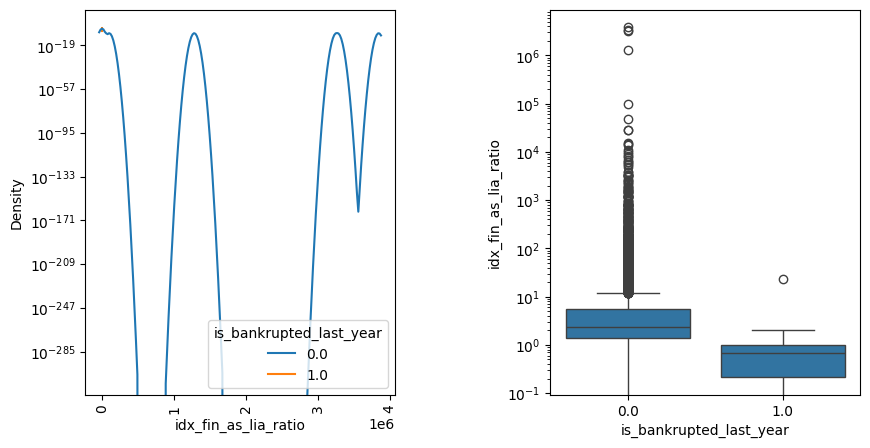

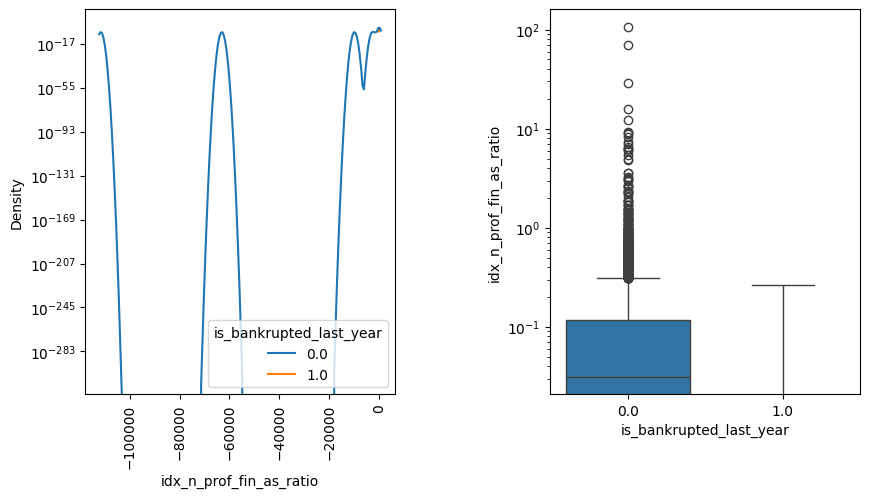

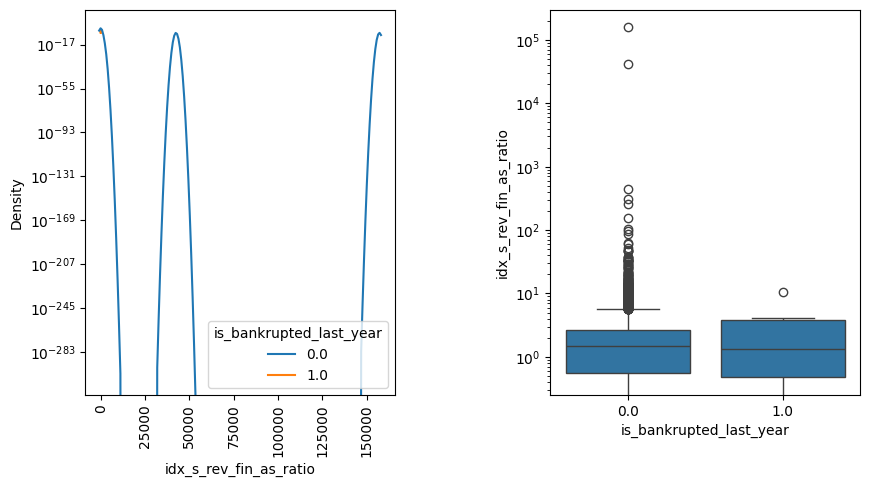

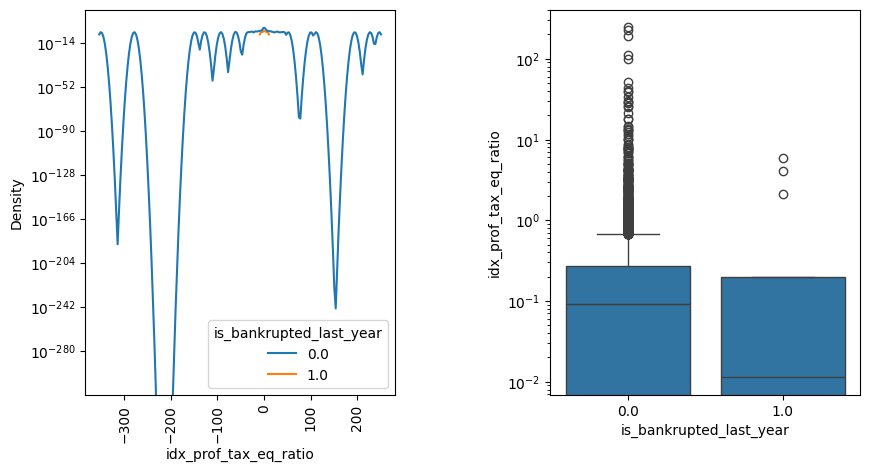

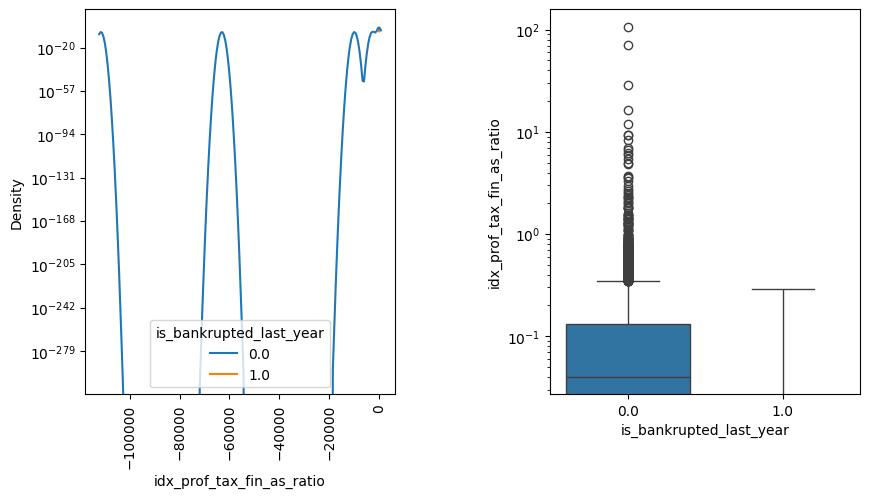

<ipython-input-22-2dbe521b7fd0>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  g = sns.kdeplot(dataset,


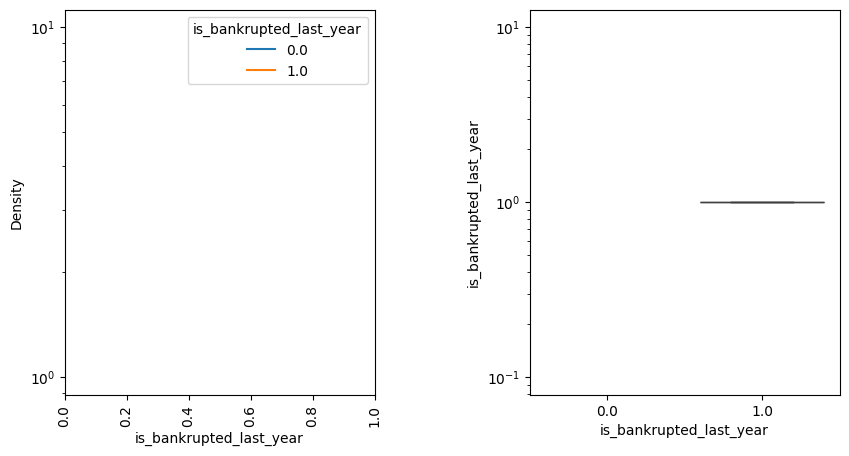

<ipython-input-22-2dbe521b7fd0>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  g = sns.kdeplot(dataset,


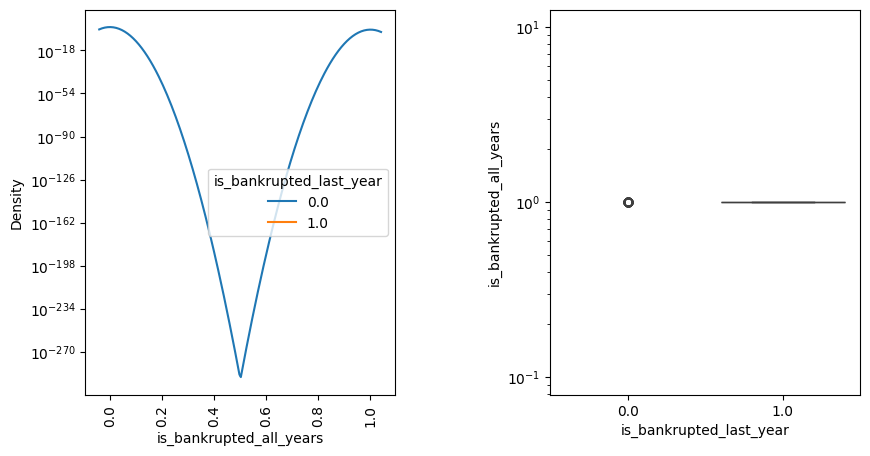

In [ ]:
for variable in dataset.columns[7:-2]:
    variable_chart(dataset, variable, 'is_bankrupted_last_year')